<a href="https://colab.research.google.com/github/Abhishek4848/IPL-Match-Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [2]:
urlfile<-'https://raw.githubusercontent.com/Abhishek4848/IPL-Match-Analysis/main/matches.csv'
df<-read.csv(url(urlfile))

In [3]:
dim(df)

[1] 756  18

# Importing Packages

In [4]:
install.packages("ggplot2")
install.packages("corrplot")
install.packages("plotrix")
library("corrplot")
library("ggplot2")
library("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



## Fixing Inconsistencies

In [5]:
df$winner[df$winner=="Rising Pune Supergiant"] = "Rising Pune Supergiants"
df$toss_winner[df$toss_winner=="Rising Pune Supergiant"] = "Rising Pune Supergiants"
df$team1[df$team1=="Rising Pune Supergiant"] = "Rising Pune Supergiants"
df$team2[df$team2=="Rising Pune Supergiant"] = "Rising Pune Supergiants"
df$city[df$city=="Bengaluru"] = "Bangalore"

## Displaying the top 5 and the bottom 5 records of the data frame

In [6]:
head(df,5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
3,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
4,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,


In [7]:
tail(df,5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
752,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,,,
755,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
756,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [71]:
list(unique(df$team1))

[[1]]
 [1] "Sunrisers Hyderabad"         "Mumbai Indians"             
 [3] "Gujarat Lions"               "Rising Pune Supergiants"    
 [5] "Royal Challengers Bangalore" "Kolkata Knight Riders"      
 [7] "Delhi Daredevils"            "Kings XI Punjab"            
 [9] "Chennai Super Kings"         "Rajasthan Royals"           
[11] "Deccan Chargers"             "Kochi Tuskers Kerala"       
[13] "Pune Warriors"               "Delhi Capitals"

### Date Operations

In [8]:
dates = data.frame(sort(table(df$date),decreasing = T))
colnames(dates) = c("Date","No. of matches")
dates$Date = format(as.Date(dates$Date),format = "%d/%m/%y") #converting character string to date object and formatting it
n = 0
for (x in dates$`No. of matches`)
{
  if (x == 2)
  {
    n=n+1
  }
}
paste("No. of days where 2 maches were held: ",n)

[1] "No. of days where 2 maches were held:  210"

2 Matches are held on weekends


### IPL season Rank

In [9]:
rank(table(df$season))

2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 
 2.0  1.0  7.0 10.0 11.0 12.0  7.0  3.5  7.0  3.5  7.0  7.0

### Ranking teams based on the No. of victories

In [66]:
rank(table(df$winner))

Chennai Super Kings 
                          1                          14 
            Deccan Chargers              Delhi Capitals 
                          7                           3 
           Delhi Daredevils               Gujarat Lions 
                          9                           5 
            Kings XI Punjab        Kochi Tuskers Kerala 
                         11                           2 
      Kolkata Knight Riders              Mumbai Indians 
                         13                          15 
              Pune Warriors            Rajasthan Royals 
                          4                          10 
    Rising Pune Supergiants Royal Challengers Bangalore 
                          6                          12 
        Sunrisers Hyderabad 
                          8

### Check whether every team which played has won atleast 1 match

In [11]:
all_teams = unique(c(df$team1,df$team2))
all(all_teams %in% df$winner)

[1] TRUE

We can infer that every team has one atleast one match in the IPL

### Teams that have won the match by more than 50 runs

In [12]:
t = c()
teams50 = which(df$win_by_runs > 50)
for(y in teams50)
{
  if(y == df$id[y])
  {
    t = append(t,df$winner[y])
  }
}
unique(t)

[1] "Delhi Daredevils"            "Kolkata Knight Riders"      
 [3] "Rising Pune Supergiants"     "Mumbai Indians"             
 [5] "Kings XI Punjab"             "Rajasthan Royals"           
 [7] "Royal Challengers Bangalore" "Chennai Super Kings"        
 [9] "Deccan Chargers"             "Sunrisers Hyderabad"

### Teams that have NOT won a match by more than 50 runs

In [69]:
setdiff(all_teams,unique(t))

[1] "Gujarat Lions"        "Kochi Tuskers Kerala" "Pune Warriors"       
[4] "Delhi Capitals"

### Checking if any match has been won by more that 150 runs

In [67]:
any(which(df$win_by_runs >150))

[1] FALSE

### Replacing team names by their abbrevation

In [14]:
# for (i in df$team1)
# {
#   if (i == 'Royal Challengers Bangalore')
#   {
#     gsub('Royal Challengers Bangalore','RCB',i)
#   }
#   gsub('Kolkata Knight Riders','KKR',i)
#   gsub('Delhi Capitals','DC',i)
#   gsub('Chennai Super Kings','CSK',i)
#   gsub('Mumbai Indians','MI',i)
#   gsub('Deccan Chargers','DCH',i)
#   gsub('Kings XI Punjab','KXIP',i)
#   gsub('Gujarat Lions','GL',i)
#   gsub('Kochi Tuskers Kerala','KT',i)
#   gsub('Pune Warriors','PWI',i)
#   gsub('Rising Pune Supergiants','RPS',i)
#   gsub('Rajasthan Royals','RR',i)
# }

# Exploratory Data Analysis

In [15]:
summary(df)

       id              season         city               date          
 Min.   :    1.0   Min.   :2008   Length:756         Length:756        
 1st Qu.:  189.8   1st Qu.:2011   Class :character   Class :character  
 Median :  378.5   Median :2013   Mode  :character   Mode  :character  
 Mean   : 1792.2   Mean   :2013                                        
 3rd Qu.:  567.2   3rd Qu.:2016                                        
 Max.   :11415.0   Max.   :2019                                        
    team1              team2           toss_winner        toss_decision     
 Length:756         Length:756         Length:756         Length:756        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

### Correlation matrix

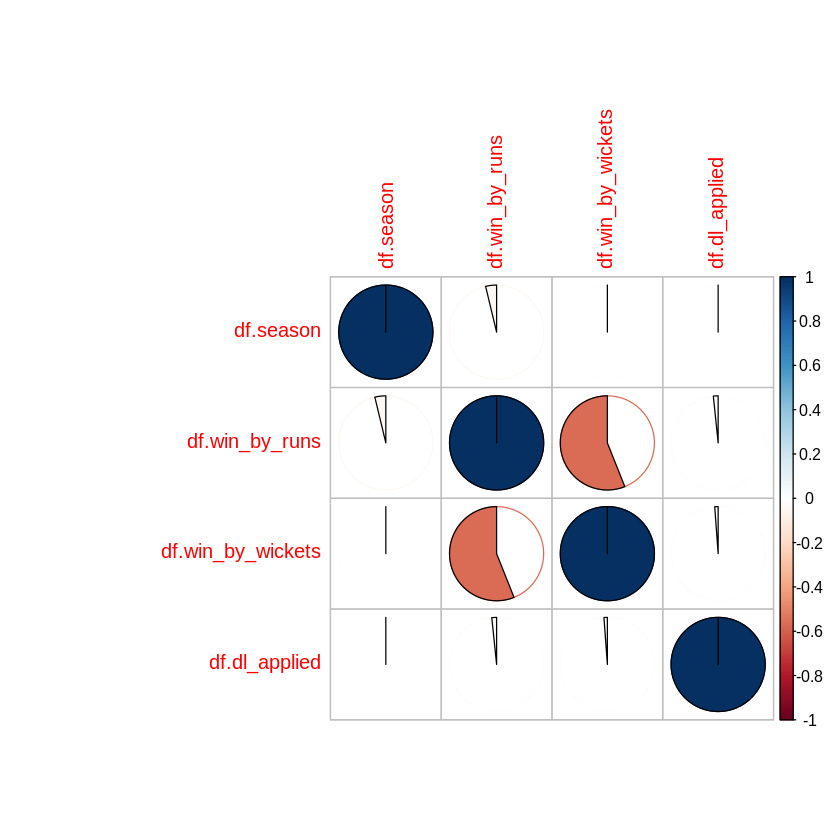

In [16]:
x = data.frame(df$season,df$win_by_runs,df$win_by_wickets,df$dl_applied)
corrplot(cor(x),method="pie")

### Biggest Margin of Victory by Batting team

In [62]:
max = df$win_by_runs[1]
runs = c(df$win_by_runs)
for(runs in runs)
{
  if(runs > max)
  {
    max = runs
  }
}
max

[1] 146

### Biggest Margin of Victory by Bowling team

In [63]:
max = df$win_by_wickets[1]
wick = array(df$win_by_wickets)
for(wickets in wick)
{
  if(wickets > max)
  {
    max = wickets
  }
}
max

[1] 10

### No. of times First Batting team won the match

In [19]:
first_bat_win = 0
for(x in seq(1,length(df$id)))
{
  if(df$toss_decision[x] == "bat" & df$toss_winner[x] == df$winner[x])
  {
    first_bat_win = first_bat_win + 1
  }
}
first_bat_win

[1] 134

### No. of times First Feilding team won the match

In [20]:
first_field_win = 0
for(x in seq(1,length(df$id)))
{
  if(df$toss_decision[x] == "field" & df$toss_winner[x] == df$winner[x])
  {
    first_field_win = first_field_win + 1
  }
}
first_field_win

[1] 259

### Finding the Mean win by runs using Recursion

In [21]:
findMean = function(A,len)
{
  if (len == 1)
    return (A[len])
  else
    return((findMean(A,len-1)*(len-1)+A[len-1])/len)
}
findMean(df$win_by_runs,length(df$win_by_runs))

[1] 13.32804

### Most Successful teams in the History of IPL

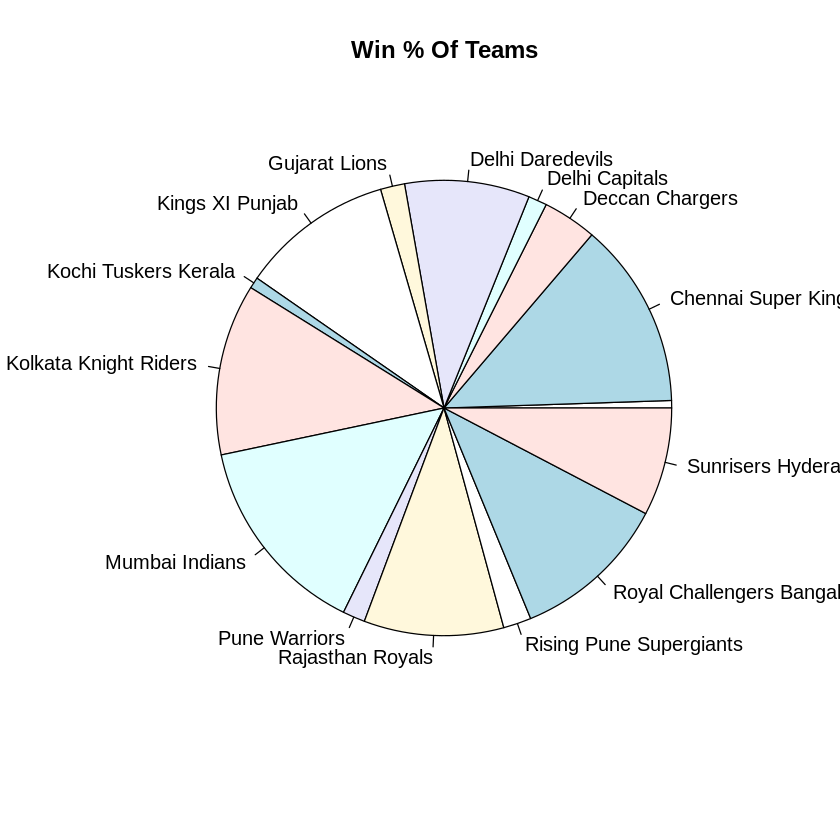

In [22]:
pie(table(df$winner),main="Win % Of Teams")

In [23]:
win = c(df$winner)
winners<-data.frame(sort(table(win),decreasing=T))
winners

win,Freq
<fct>,<int>
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


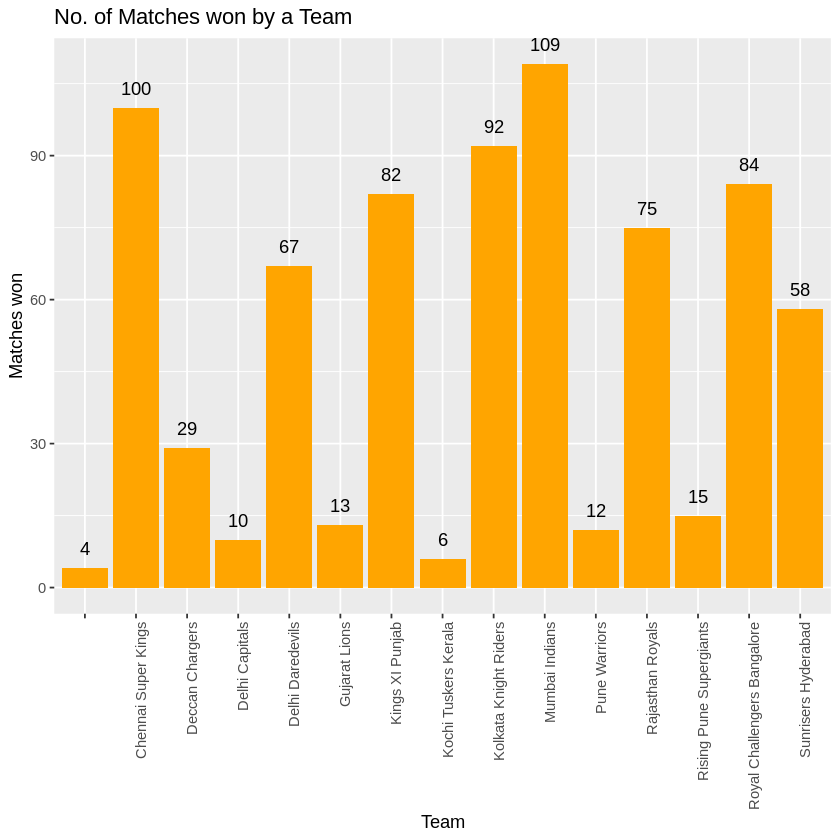

In [24]:
ggplot(df,aes(winner)) +geom_bar(fill="orange") +theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+ylab("Matches won")+
stat_count(aes(y=..count..,label=..count..),geom="text",vjust=-1)+ggtitle("No. of Matches won by a Team")

From the above data, we can conclude that MI, CSK and KKR are the most successful teams

### No. of matches played in each season

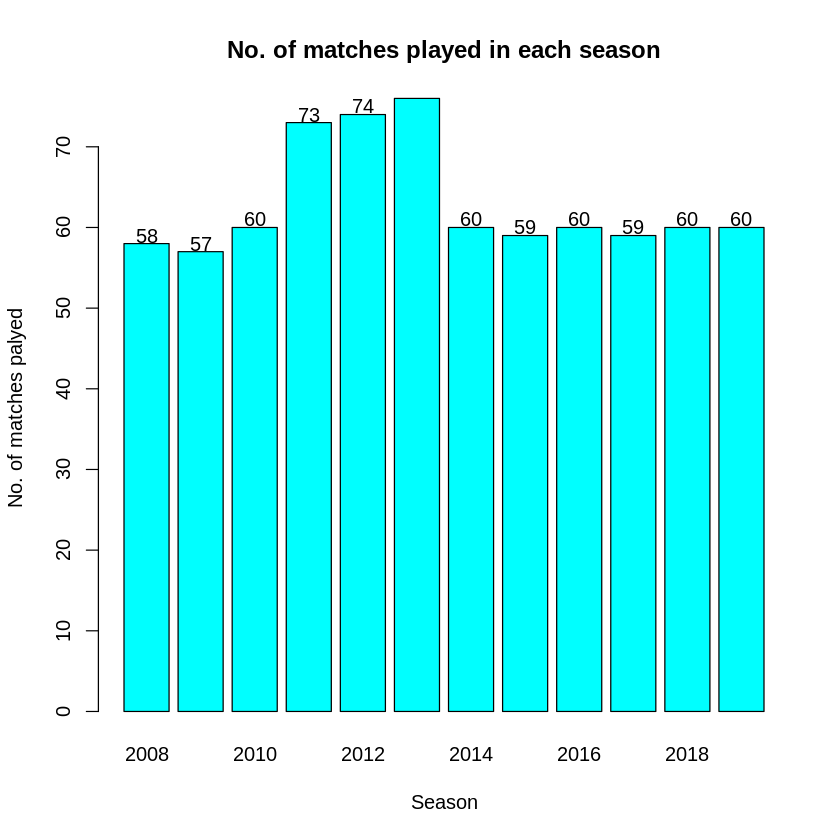

In [25]:
b = barplot(table(df$season), xlab="Season",ylab="No. of matches palyed",main="No. of matches played in each season",col="cyan")
text(x=b, y= table(df$season)+1, labels=as.character(table(df$season)))

### No. of matches played in a venue

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


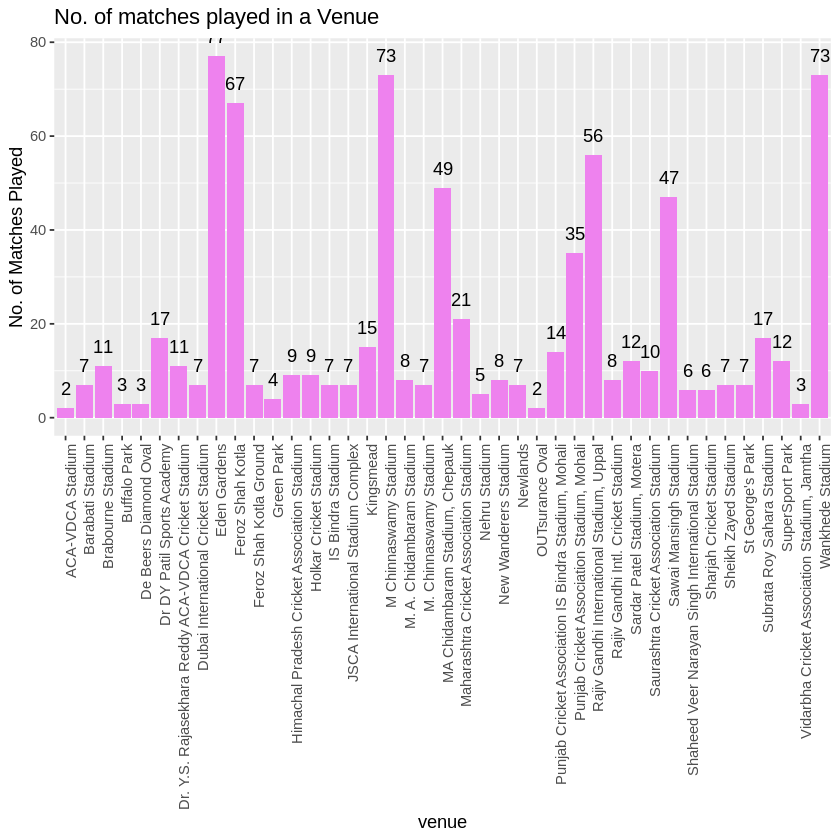

In [26]:
library("ggplot2")
ggplot(data = df,aes(venue)) +geom_histogram(fill="violet",stat="count") +ylab("No. of Matches Played")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
stat_count(aes(y=..count..,label=..count..),geom="text",vjust=-1)+ggtitle("No. of matches played in a Venue")

[1] "Mean:  3"

[1] "Variance:  11"

[1] "Standard deviation:  3"

[1] "1st Quartile:  0"

[1] "Median:  4"

[1] "3rd Quartile:  6"

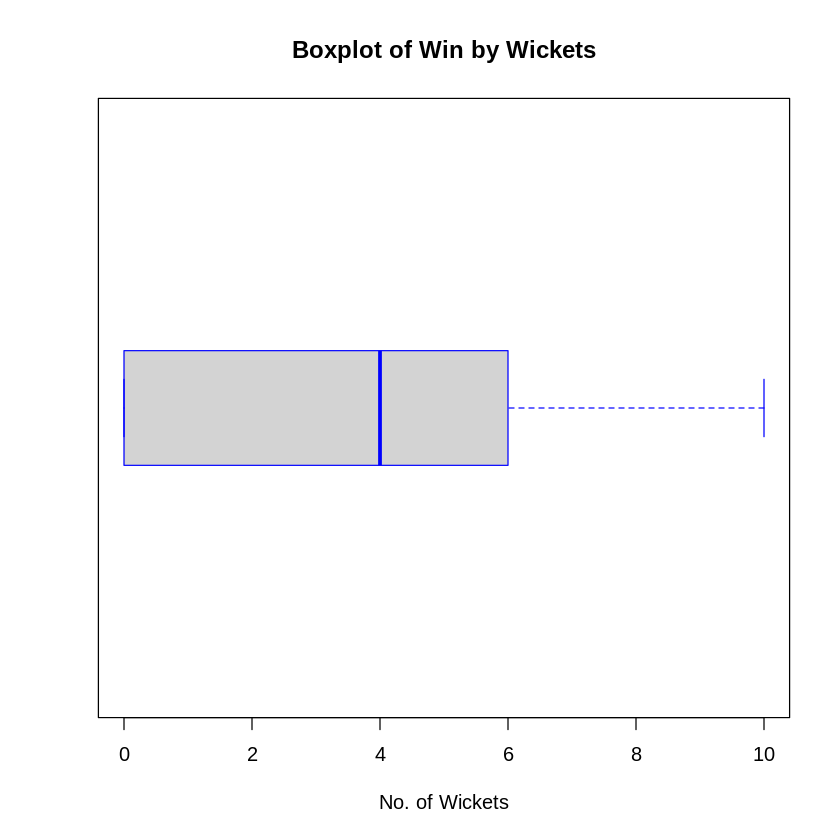

In [47]:
boxplot(df$win_by_wickets, horizontal=T, varwidth=TRUE,outline=TRUE, boxwex=0.2, border=c("blue"),xlab = "No. of Wickets",main="Boxplot of Win by Wickets")
paste("Mean: ",round(mean(df$win_by_wickets)))
paste("Variance: ",round(var(df$win_by_wickets)))
paste("Standard deviation: ",round(sd(df$win_by_wickets)))
paste("1st Quartile: ",quantile(df$win_by_wickets,prob=c(0.25)))
paste("Median: ",quantile(df$win_by_wickets,prob=c(0.50)))
paste("3rd Quartile: ",quantile(df$win_by_wickets,prob=c(0.75)))

### Boxplot Comparing the Win by Runs of different teams

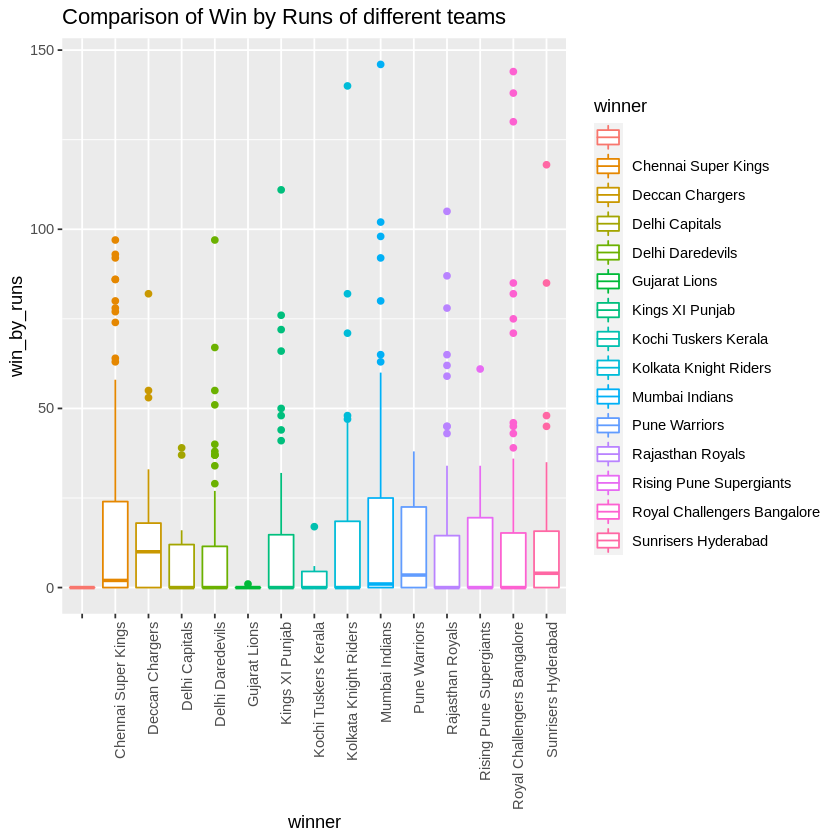

In [57]:
ggplot(df, aes(winner,win_by_runs,color=winner)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("Comparison of Win by Runs of different teams")

The outliers in the above data are plausibe, hence cannot be excluded

In [64]:
summary(df$win_by_runs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   13.28   19.00  146.00 

### Toss Decision

Decision,Count
<fct>,<int>
bat,293
field,463


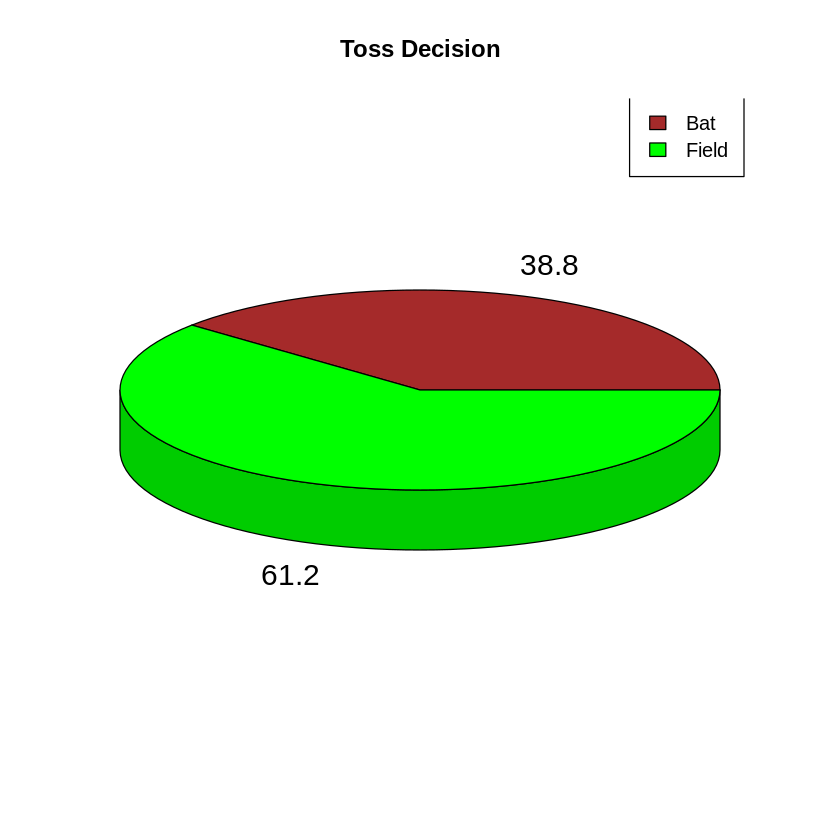

In [29]:
toss = data.frame(table(df$toss_decision))
colnames(toss) = c("Decision","Count")
pieper = round(100*toss$Count/sum(toss$Count), 1)
toss
pie3D(table(df$toss_decision),labels=pieper,main="Toss Decision",col=c("brown","green"))
legend("topright",c("Bat","Field"),fill=c("brown","green"))

### Duckworth Lewis Stern Applied

Status,Count
<chr>,<int>
Not Applied,737
Applied,19


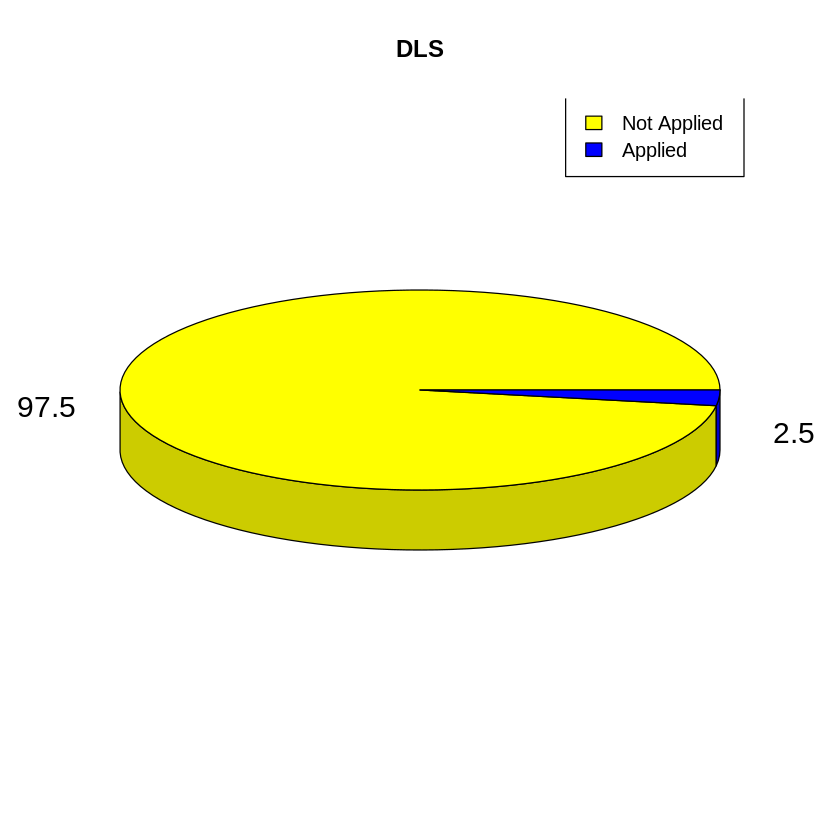

In [30]:
dls = data.frame(table(df$dl_applied))
colnames(dls) = c("Status","Count")
dls$Status = as.character(dls$Status)
dls$Status[dls$Status == "0"] = "Not Applied"
dls$Status[dls$Status == "1"] = "Applied"
piepercent = round(100*dls$Count/sum(dls$Count), 1)
pie3D(dls$Count, labels=piepercent,col=c("yellow","blue"),main="DLS")
legend("topright",c(dls$Status),fill=c("yellow","blue"))
dls

### Best Stadium for winning by runs

In [31]:
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
mode(df$venue[df$win_by_runs])

[1] "Wankhede Stadium"

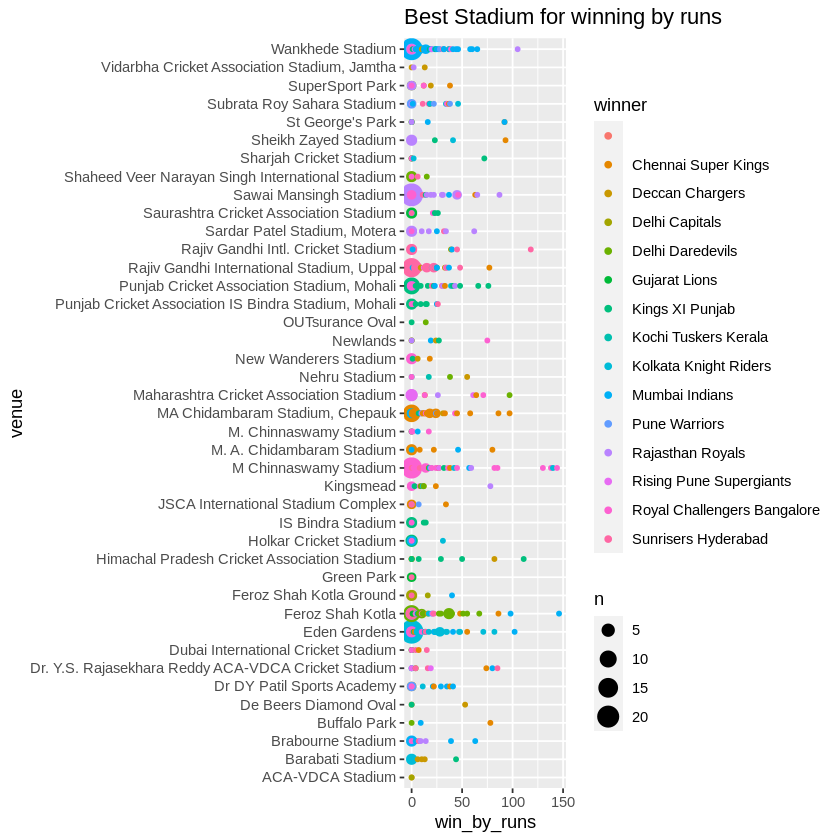

In [32]:
ggplot(df, aes(win_by_runs, venue, colour = winner)) + geom_count() + ggtitle("Best Stadium for winning by runs")

### Best Stadium for winning by wickets

In [33]:
mode(df$venue[df$win_by_wickets])

[1] "Holkar Cricket Stadium"

### Best Defending Team

In [34]:
mode(df$winner[df$win_by_runs])

[1] "Mumbai Indians"

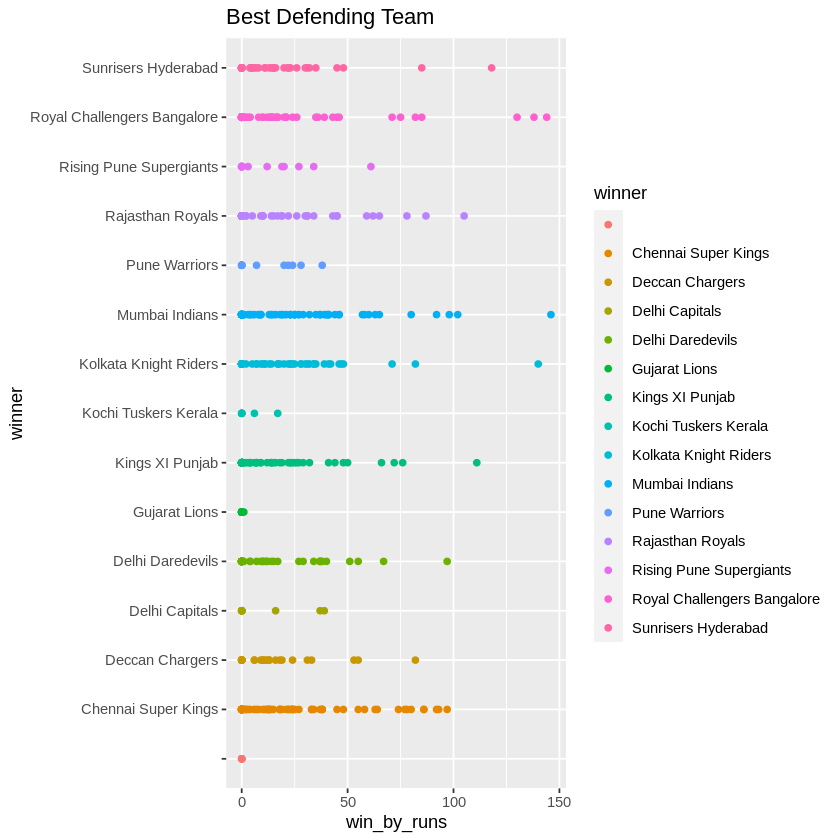

In [45]:
ggplot(df, aes(win_by_runs, winner, colour = winner)) + geom_point() + ggtitle("Best Defending Team")

### Best Chasing Team

In [36]:
mode(df$winner[df$win_by_wickets])

[1] "Kings XI Punjab"

### Player of the match

In [37]:
player_match = data.frame(sort(table(df$player_of_match),decreasing = T))
colnames(player_match) = c("Player Name","No. Player of the Match awards won")
head(player_match,20)

,Player Name,No. Player of the Match awards won
,<fct>,<int>
1,CH Gayle,21
2,AB de Villiers,20
3,DA Warner,17
4,MS Dhoni,17
5,RG Sharma,17
6,YK Pathan,16
7,SR Watson,15
8,SK Raina,14
9,G Gambhir,13


# Distributions

### Poisson Distribution

Probability that a match is won by 10 0r less than 10 runs

In [38]:
mean_win_runs = mean(df$win_by_runs)
p = ppois(10,mean_win_runs)
p

[1] 0.2281699

Probability that a match is won exactly by 5 runs

In [39]:
dpois(5,mean_win_runs)

[1] 0.005868774

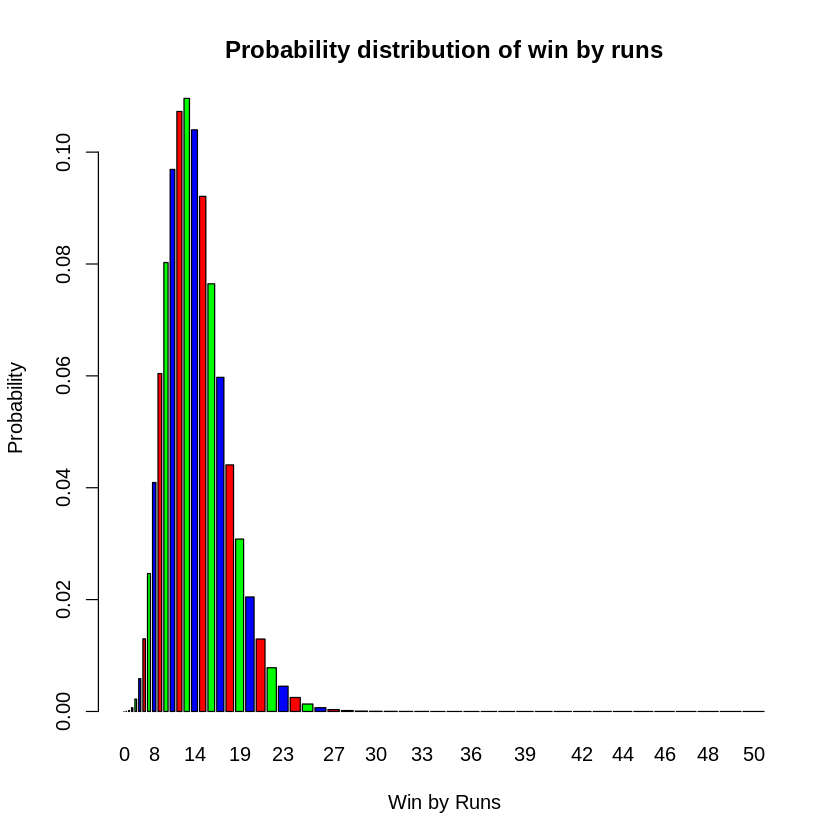

In [59]:
bar = dpois(c(0:50),mean_win_runs)
barplot(bar,c(0:50),names.arg=c(0:50),main="Probability distribution of win by runs",col=c("red","green","blue"),xlab = "Win by Runs",ylab = "Probability")

Probability that a match is won by more than 6 wickets

---



In [41]:
mean_win_wickets = mean(df$win_by_wickets)
p1 = 1-ppois(6,mean_win_wickets)
p1

[1] 0.05437779

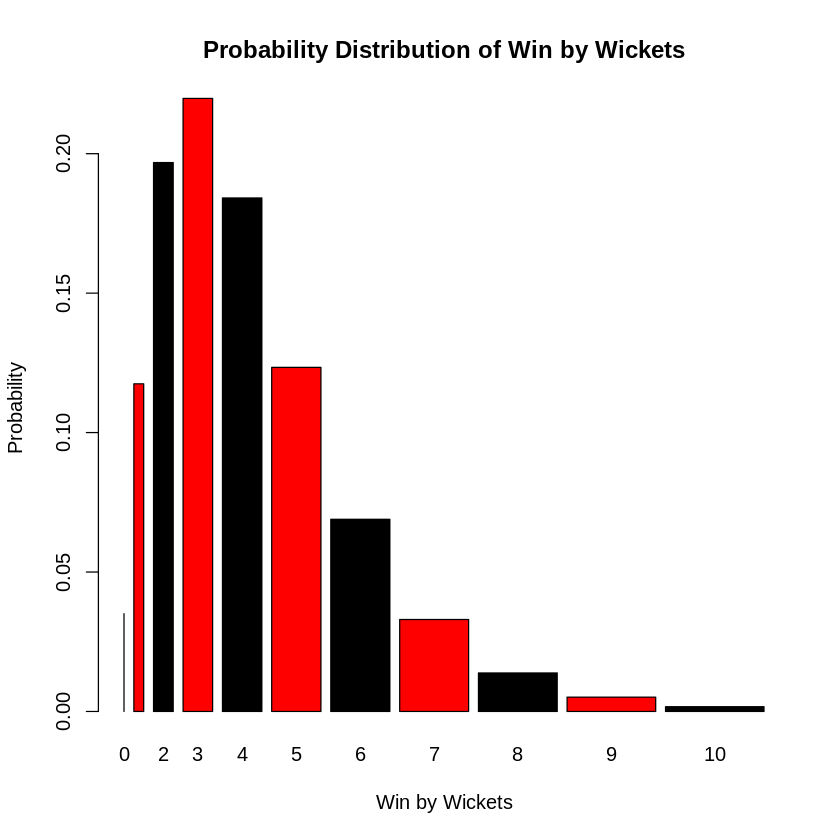

In [61]:
plt = dpois(c(0:10),mean_win_wickets)
barplot(plt,c(0:10),names.arg = c(0:10),xlab="Win by Wickets",ylab="Probability",main="Probability Distribution of Win by Wickets",col=c("black","red"))

# Hypothesis Testing

### Null Hypothesis H0:
### Alternate hypothesis H1: